## A brief explaination of LRP

During our investigation, we will implement the Layer-wise relevance propogation (LRP) algorithm to analyze how our best-performing models make decisions. This section provides a brief introduction the LRP's methodology, and the algorithm's output.

### Methodology overview: 

LRP is a backward propogation technique which ultimately aims to explain how a Deep Neural Network (DNN) has made a particular prediction. The algorithm operates as follows:

1. a relevance score is assigned to each neuron in the output layer. In our application domain of image classification, this relevance score will be equivalent to the probability value the model gave for that particular class which that neuron represents. [1]

2. The relevance score of each neuron in the output layer is redistributed across the previous layer according to a predefined rule. There are many different potential redistribution rules however a common example is the $ \alpha\beta $ rule [2]. We formally define this redistribution below:  
    - $R_j^l$, is the relevance score for the $j^{th}$  neuron in layer $l$. 
    - Define $ S_l $ to be the set of indices of all the neurons in layer $l$. 
    - We define $R^{l+1}_{j \gets k}$ to be the share of $R_{k}^{l+1}$ given to our original $j^{th}$ neuron in layer $l$. 
    - Hence, we have that $ R_j^l = \sum_{k \in S_{l+1}} R_{j \gets k}^{l+1} $. 
    - Under the $ \alpha\beta $ rule, we have that 
    - $ R_{j \gets k}^{l+1} = (\alpha \frac{a_j^l w_{jk}^+}{\sum_{j}a_j^l w_{jk}^+} - \beta \frac{a_j w_{jk}^-}{\sum_{j}a_j w_{jk}^-})R_k $ where we define $a_j^l$ as the activation function output for neuron $j$ in layer $l$ and $ w_{jk} $ to be the weight of the connection between neuron $j$ in layer $l$ and neuron $k$ in layer $l+1$. Note also that the values of $\alpha$ and $\beta$ are determined by the implimentor of the algorithm. [2]

3. This process is repeated back through the network until we reach the input layer. The algorithm then outputs a heatmap over the input which highlights the contribution of each input feature to the NN's final prediction. In image classification, LRP generates a heatmap that is overlayed on the original image to display which pixels contributed most in impacting the model's classification. In the case of brain scans for tumor detection, LRP may highlight the areas where the deep learning model recognizes abnormal tissue.

### LRP output: an example implimentation

As aforementioned, in image classification, a successful implementation of Layer-wise Relevance Propagation (LRP) generates a heatmap that visualizes the areas of the image most influential in the model’s decision-making process. This heatmap highlights regions that contribute positively or negatively to the prediction of that specific class it chose (for example, regions that strongly backed the models prediction may appear a dark red whereas regions that strongly opposed the models prediction may appear a dark blue whilst areas that were less influential appear somewhere in the middle). Consider below the implimentation of LRP on MNIST, a database composed of 60,000 handwritten numeric digits.

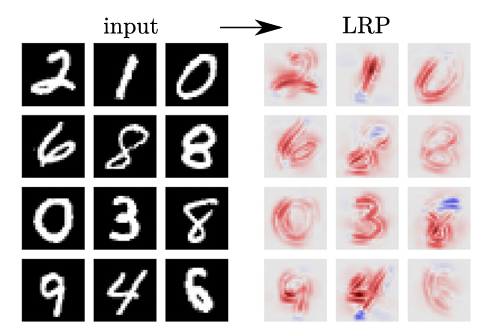 [2]

Here, we see particular areas that positively contributed to the model's prediction (such as the lefthand side of the 4 as well as the bottom of the 8 digit). however, we also see areas negatively contribute to the prediction (such as the bottom of the 4 or the top of the 8). 

In summary, LRP can be a highly effective tool for establishing providing a link between the model output and its input features. By providing a visual insight into how specific image features directly contribute to the classification of a particular image, LRP works to make our models more transparent and interpretable meaning we can be more assured in our model predictions. 

### References

[1] wana, B.K., Kuroki, R. and Uchida, S., 2019. Explaining convolutional neural networks using softmax gradient layer-wise relevance propagation. arXiv preprint arXiv:1908.04351. Available at: https://ar5iv.labs.arxiv.org/html/1908.04351 [Accessed 3 Nov. 2024].

[2] Montavon, G., Samek, W., and Müller, K.-R., 2019. Methods for Interpreting and Understanding Deep Neural Networks. Springer